In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
%run ../common/functions.py
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels
np.random.seed(seed=123)

In [2]:
def Regression1D(GPR,_xsample, _ysample, _x, normalization = True):
    if (normalization):
        xmin = np.amin(_x)
        xmax = np.amax(_x)
        xmid = 0.5*(xmin + xmax)
        _x = (_x - xmid)/(xmax - xmin)
        _xsample = (_xsample - xmid)/(xmax - xmin)
        ymin = np.amin(_ysample)
        ymax = np.amax(_ysample)
        ymid = 0.5*(ymin + ymax)
        _ysample = (_ysample - ymid)/(ymax - ymin)
    _Xsample = _xsample.reshape(-1,1)
    GPR.fit(_Xsample, _ysample)
    _X = _x.reshape(-1,1)
    mean, std = GPR.predict(_X, return_std=True) #Get the maen and standard error for the first trial set
    if (normalization):
        mean = mean*(ymax - ymin) + ymid
        std = std*(ymax -ymin)
    return mean, std

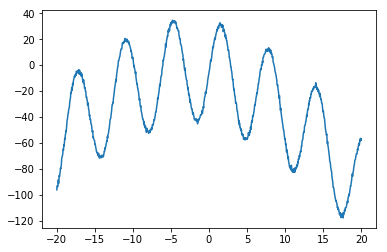

In [3]:
#Define data, supervised data
def target_func(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
#
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx)
z = list(map(target_func,x)) #for python3
z = np.array(z)
plt.plot(x, z) #### plot true data
plt.show()
def generate_sample(xval):
    xid = np.argmin((x - xval)**2)
    return z[xid]

In [4]:
#Define GPR and Bayesian opt.
Noptimize = 100
kernel = kernels.ConstantKernel() + kernels.ConstantKernel()*kernels.RBF()
#kernel = kernels.RBF()
#kernel = kernels.ConstantKernel() + kernels.ConstantKernel()*kernels.Matern(nu=0.5)
#kernel = kernels.Matern(nu=0.5)
GPR = GaussianProcessRegressor(kernel=kernel, alpha=1e-8, normalize_y=True, optimizer='fmin_l_bfgs_b', \
                                   copy_X_train=True, n_restarts_optimizer=Noptimize, random_state=123) 
#
BO = Bayesian_opt()
#BO.aqui_name = 'EI'
#BO.aqui_name = 'PI'
BO.aqui_name = 'UCB'
print('# The choice of acquisition function: ',BO.aqui_name)

# The choice of acquisition function:  UCB


epoch =  0 , x_point, maxval = -12.781861371329658,  -35.111729295690374
epoch =  1 , x_point, maxval = -20.0,  -35.111729295690374
epoch =  2 , x_point, maxval = -19.95995995995996,  -35.111729295690374
epoch =  3 , x_point, maxval = -12.512512512512512,  -24.060964009254885
epoch =  4 , x_point, maxval = -12.112112112112111,  -6.417336023264365
epoch =  5 , x_point, maxval = -11.27127127127127,  16.627626364412563
epoch =  6 , x_point, maxval = -17.75775775775776,  16.627626364412563
epoch =  7 , x_point, maxval = -10.91091091091091,  18.507184276231506


/home/shinohara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 1.25      , -0.20410538,  0.40822846]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


epoch =  8 , x_point, maxval = -8.70870870870871,  18.507184276231506
epoch =  9 , x_point, maxval = -10.95095095095095,  18.996488789899487
epoch =  10 , x_point, maxval = -11.03103103103103,  20.5851395755408
epoch =  11 , x_point, maxval = -10.43043043043043,  20.5851395755408
epoch =  12 , x_point, maxval = -10.59059059059059,  20.5851395755408
epoch =  13 , x_point, maxval = -9.98998998998999,  20.5851395755408


/home/shinohara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 1.24174798e-04, -2.89388535e-06,  1.73784947e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 87, 'nit': 29, 'warnflag': 2}
  " state: %s" % convergence_dict)


epoch =  14 , x_point, maxval = -11.15115115115115,  20.5851395755408
epoch =  15 , x_point, maxval = -11.551551551551551,  20.5851395755408


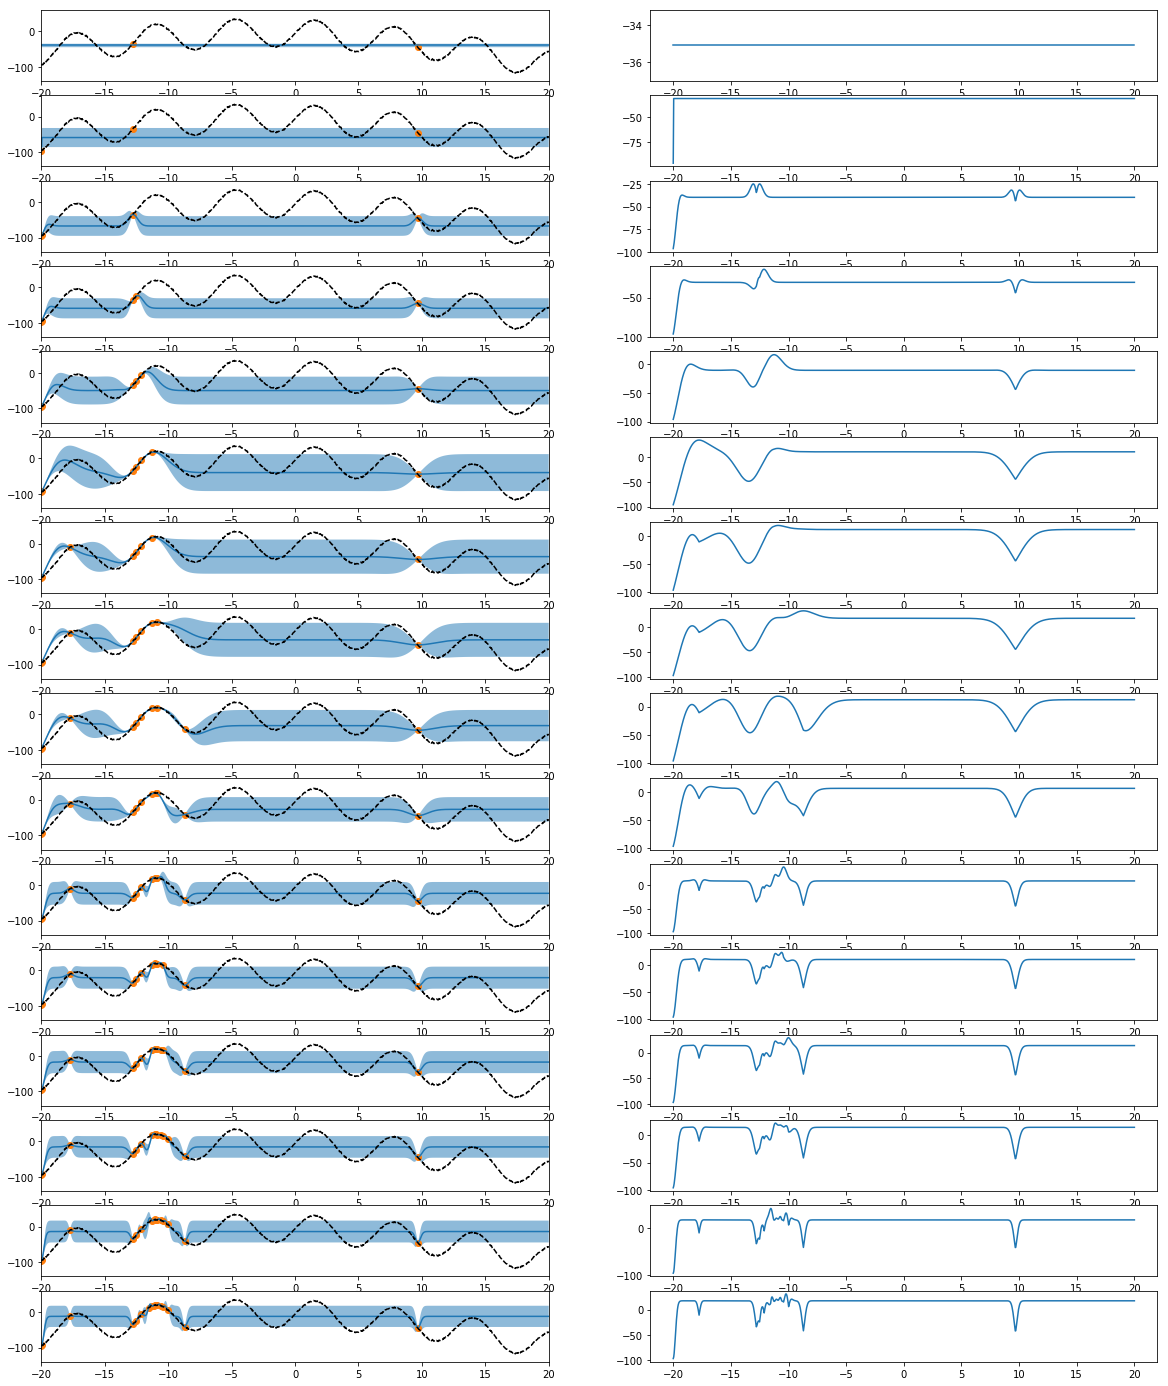

# Actual value of maximum is [34.6804609]
# Got value in the Bayesian_opt is 20.5851395755408
# Optimization is finished.


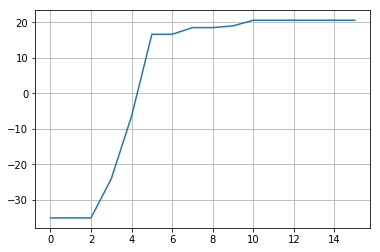

In [5]:
#Definition of array
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(-20,20) #Initial point is randomely chosen
x_sample = np.append(x_sample,x_point) 
y_point = generate_sample(x_point) 
y_sample = np.append(y_sample,y_point) 
x_point = np.random.uniform(-20,20) #Second point is randomely chosen as well
#
maxval_list = []
#
epoch = 16 #Number of optimization
Nplotevery = 1
maxval = 'Initial'
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_sample:
        x_sample = np.append(x_sample,x_point)                          #Add x_point to x_sample
        y_point = generate_sample(x_point)                              #Get y_point value from x_sample
        y_sample = np.append(y_sample,y_point)                          #Add y_point to x_ample
        print ("epoch = ",str(i),", x_point, maxval = "+str(x_point)+',  '+str(max(y_sample)))
    else: 
        print('No new sampling point in this sequence.')
    #mean, std = GPR.xsample2meanvariance(x_sample, y_sample, x, eps = 1.0e-10) #Get mean/std
    mean, std = Regression1D(GPR,x_sample,y_sample,x)

    maxval = max(y_sample)                                                     #Update maximum value up to now
    aqui = BO.get_aqui(mean, std, maxval)                                      #Define acquisition function
    x_point = x[np.argmax(aqui)]                                               #Determin the next candidate of the search
    maxval_list.append(maxval)
    if(i%Nplotevery==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x,np.array(mean))
        plt.plot(x,z,'k--')
        high_bound = mean+ 1.0*std
        lower_bound = mean- 1.0*std
        plt.fill_between(x,high_bound,lower_bound, alpha=0.5)
        plt.xlim(-20,20)
        plt.ylim(-140,60)
        plt.scatter(x_sample,y_sample)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x,aqui)
        plt.savefig("bayes_"+str(BO.aqui_name)+".png")
plt.show()

print("# Actual value of maximum is "+str(max(z)))
print("# Got value in the Bayesian_opt is "+str(maxval))
print("# Optimization is finished.")
plt.figure()
plt.plot(maxval_list)
plt.grid()
plt.show()